In [79]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exploratory Data Analysis - Pittsburgh Penguins 2015-2016 Playoff Data
## 2015-2016 Stanley Cup Winners
--------
### To begin the EDA process, I use the SQL query below to quickly get the data I'm looking for.
* game type 'P' = Playoff Game
* Penguins team id = 5
### After creating the query, I connected to the NHL_data database and created a pandas df for easier manipulation and analysis.


In [36]:
playoff_20152016_data_query = ('''
SELECT game.game_id, game_plays.*, game_plays_players.player_id, player_info.firstName, player_info.lastName FROM game
JOIN game_plays ON game.game_id = game_plays.game_id
JOIN game_plays_players ON game_plays.play_id = game_plays_players.play_id
JOIN player_info ON game_plays_players.player_id = player_info.player_id
WHERE game.type = 'P'
    AND game.season = 20152016
    AND (
        game.home_team_id = 5
        OR
        game.away_team_id = 5
        );
''')

In [37]:
conn = sqlite3.connect('NHL_data.db')

In [38]:
pens_201516_playoff_df = pd.read_sql_query(playoff_20152016_data_query, conn)

In [39]:
pens_201516_playoff_df.head()

,game_id,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,player_id,firstName,lastName
0,2015030141,2015030141_10,2015030141,3.0,5.0,Hit,None,-96.0,31.0,1,...,1098.0,2016-04-14 01:12:35,0,0,Jesper Fast hit Olli Maatta,96.0,-31.0,8475855,Jesper,Fast
1,2015030141,2015030141_10,2015030141,3.0,5.0,Hit,None,-96.0,31.0,1,...,1098.0,2016-04-14 01:12:35,0,0,Jesper Fast hit Olli Maatta,96.0,-31.0,8476874,Olli,Maatta
2,2015030141,2015030141_100,2015030141,3.0,5.0,Hit,None,-98.0,30.0,1,...,222.0,2016-04-14 01:44:19,0,0,Jesper Fast hit Carl Hagelin,98.0,-30.0,8474176,Carl,Hagelin
3,2015030141,2015030141_100,2015030141,3.0,5.0,Hit,None,-98.0,30.0,1,...,222.0,2016-04-14 01:44:19,0,0,Jesper Fast hit Carl Hagelin,98.0,-30.0,8475855,Jesper,Fast
4,2015030141,2015030141_101,2015030141,3.0,5.0,Hit,None,-89.0,-37.0,1,...,215.0,2016-04-14 01:44:26,0,0,Jesper Fast hit Justin Schultz,89.0,37.0,8474602,Justin,Schultz


The query was quick and easy, but seems to have given some repetitive data. To confirm, I checked the columns:

In [40]:
pens_201516_playoff_df.columns

Index(['game_id', 'play_id', 'game_id', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'player_id', 'firstName',
       'lastName'],
      dtype='object')

As expected, some columns are the same. Also noticeable is how there is both an x, y and a st_x, st_y. Only one set of coordinates is needed. 
Below I drop any duplicated columns, as well as any additional columns that are unnecessary at this time.

In [50]:
pens_201516_playoff_df = pens_201516_playoff_df.iloc[:,~pens_201516_playoff_df.columns.duplicated()]

In [60]:
pens_201516_playoff_df = pens_201516_playoff_df.drop(['dateTime','st_x','st_y'], axis=1)

I'd like to see what we're looking at for event, secondaryType, and periodType:

In [61]:
pens_201516_playoff_df.event.unique()

array(['Hit', 'Shot', 'Faceoff', 'Blocked Shot', 'Missed Shot',
       'Takeaway', 'Goal', 'Penalty', 'Giveaway'], dtype=object)

In [62]:
pens_201516_playoff_df.secondaryType.unique()

array([None, 'Wrist Shot', 'Snap Shot', 'Slap Shot', 'Interference',
       'Backhand', 'Holding', 'Tripping', 'Tip-In',
       'Hi stick - double minor', 'Roughing', 'Interference - Goalkeeper',
       'Wrap-around', 'Hooking', 'Illegal check to head',
       'Unsportsmanlike conduct', 'Slashing', 'Cross checking',
       'Fighting', 'Boarding', 'Holding the stick', 'Hi-sticking',
       'Embellishment', 'Too many men on the ice',
       'Delaying Game - Puck over glass', 'Elbowing', 'Misconduct',
       'Deflected'], dtype=object)

In [63]:
pens_201516_playoff_df.periodType.unique()

array(['REGULAR', 'OVERTIME'], dtype=object)

Next, I want to check for null values in the df:

In [64]:
pens_201516_playoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13179 entries, 0 to 13178
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              13179 non-null  int64  
 1   play_id              13179 non-null  object 
 2   team_id_for          13179 non-null  float64
 3   team_id_against      13179 non-null  float64
 4   event                13179 non-null  object 
 5   secondaryType        3586 non-null   object 
 6   x                    13163 non-null  float64
 7   y                    13165 non-null  float64
 8   period               13179 non-null  int64  
 9   periodType           13179 non-null  object 
 10  periodTime           13179 non-null  int64  
 11  periodTimeRemaining  13179 non-null  float64
 12  goals_away           13179 non-null  int64  
 13  goals_home           13179 non-null  int64  
 14  description          13179 non-null  object 
 15  player_id            13179 non-null 

Secondary type is the only column that contains null values. What percent are null? Is this column worth keeping?

In [65]:
secondary_type_percent_null = (pens_201516_playoff_df['secondaryType'].isnull().sum())/13179*100
secondary_type_percent_null

72.79004476819182

In [66]:
pens_201516_playoff_df[pens_201516_playoff_df['event']=='Penalty']

,game_id,play_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,goals_away,goals_home,description,player_id,firstName,lastName
62,2015030141,2015030141_136,3.0,5.0,Penalty,Interference,84.0,-19.0,2,REGULAR,9,1191.0,0,1,Chris Kreider Interference against Kris Letang,8471724,Kris,Letang
63,2015030141,2015030141_136,3.0,5.0,Penalty,Interference,84.0,-19.0,2,REGULAR,9,1191.0,0,1,Chris Kreider Interference against Kris Letang,8475184,Chris,Kreider
153,2015030141,2015030141_193,3.0,5.0,Penalty,Holding,-74.0,-39.0,2,REGULAR,602,598.0,0,1,Dominic Moore Holding against Tom Kuhnhackl,8468575,Dominic,Moore
154,2015030141,2015030141_193,3.0,5.0,Penalty,Holding,-74.0,-39.0,2,REGULAR,602,598.0,0,1,Dominic Moore Holding against Tom Kuhnhackl,8475832,Tom,Kuhnhackl
168,2015030141,2015030141_202,5.0,3.0,Penalty,Tripping,80.0,-13.0,2,REGULAR,706,494.0,0,1,Trevor Daley Tripping against Rick Nash,8470041,Rick,Nash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,2015030416,2015030416_329,28.0,5.0,Penalty,Slashing,-35.0,11.0,3,REGULAR,662,538.0,2,1,Brent Burns Slashing against Phil Kessel,8473548,Phil,Kessel
13069,2015030416,2015030416_369,5.0,28.0,Penalty,Hi-sticking,32.0,4.0,3,REGULAR,1190,10.0,3,1,Eric Fehr Hi-sticking against Joe Pavelski,8470611,Eric,Fehr
13070,2015030416,2015030416_369,5.0,28.0,Penalty,Hi-sticking,32.0,4.0,3,REGULAR,1190,10.0,3,1,Eric Fehr Hi-sticking against Joe Pavelski,8470794,Joe,Pavelski
13094,2015030416,2015030416_51,28.0,5.0,Penalty,Tripping,-44.0,36.0,1,REGULAR,470,730.0,0,0,Dainius Zubrus Tripping against Brian Dumoulin,8464977,Dainius,Zubrus


In [67]:
pens_201516_playoff_df[pens_201516_playoff_df['event']=='Shot']

,game_id,play_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,goals_away,goals_home,description,player_id,firstName,lastName
10,2015030141,2015030141_104,3.0,5.0,Shot,Wrist Shot,-80.0,6.0,1,REGULAR,997,203.0,0,0,Eric Staal Wrist Shot saved by Jeff Zatkoff,8470595,Eric,Staal
11,2015030141,2015030141_104,3.0,5.0,Shot,Wrist Shot,-80.0,6.0,1,REGULAR,997,203.0,0,0,Eric Staal Wrist Shot saved by Jeff Zatkoff,8473553,Jeff,Zatkoff
14,2015030141,2015030141_107,5.0,3.0,Shot,Wrist Shot,34.0,21.0,1,REGULAR,1005,195.0,0,0,Tom Kuhnhackl Wrist Shot saved by Henrik Lundq...,8468685,Henrik,Lundqvist
15,2015030141,2015030141_107,5.0,3.0,Shot,Wrist Shot,34.0,21.0,1,REGULAR,1005,195.0,0,0,Tom Kuhnhackl Wrist Shot saved by Henrik Lundq...,8475832,Tom,Kuhnhackl
18,2015030141,2015030141_109,5.0,3.0,Shot,Wrist Shot,54.0,-33.0,1,REGULAR,1014,186.0,0,0,Eric Fehr Wrist Shot saved by Henrik Lundqvist,8468685,Henrik,Lundqvist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13161,2015030416,2015030416_9,5.0,28.0,Shot,Slap Shot,-34.0,-31.0,1,REGULAR,59,1141.0,0,0,Olli Maatta Slap Shot saved by Martin Jones,8476874,Olli,Maatta
13169,2015030416,2015030416_95,5.0,28.0,Shot,Wrist Shot,-61.0,-3.0,1,REGULAR,989,211.0,1,0,Sidney Crosby Wrist Shot saved by Martin Jones,8471675,Sidney,Crosby
13170,2015030416,2015030416_95,5.0,28.0,Shot,Wrist Shot,-61.0,-3.0,1,REGULAR,989,211.0,1,0,Sidney Crosby Wrist Shot saved by Martin Jones,8474889,Martin,Jones
13173,2015030416,2015030416_97,5.0,28.0,Shot,Wrist Shot,-86.0,9.0,1,REGULAR,994,206.0,1,0,Sidney Crosby Wrist Shot saved by Martin Jones,8471675,Sidney,Crosby


After seeing that 73% of secondaryType rows are NULL, I was initially tempted to drop the column entirely.
However, after taking a look at what the unique values are it occured to me that the entries mostly correspond with Shots and Penalties.
Because this information could be very useful, I want to keep the column for now.

### What now? What am I looking for?
I'm curious about the plays and player stats for the 3rd Line. 
For the Playoffs, this was: Carl Hagelin, Nick Bonino, and Phil Kessel (well-known as the 'HBK line')

In [114]:
HBK_line_201516_playoff_df = pens_201516_playoff_df[pens_201516_playoff_df['lastName'].isin(['Hagelin','Bonino','Kessel'])]
HBK_line_201516_playoff_df.head()

,game_id,play_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,goals_away,goals_home,description,player_id,firstName,lastName
2,2015030141,2015030141_100,3.0,5.0,Hit,None,-98.0,30.0,1,REGULAR,978,222.0,0,0,Jesper Fast hit Carl Hagelin,8474176,Carl,Hagelin
9,2015030141,2015030141_103,5.0,3.0,Hit,None,-48.0,40.0,1,REGULAR,992,208.0,0,0,Carl Hagelin hit Kevin Klein,8474176,Carl,Hagelin
21,2015030141,2015030141_11,5.0,3.0,Shot,Snap Shot,45.0,-19.0,1,REGULAR,115,1085.0,0,0,Phil Kessel Snap Shot saved by Henrik Lundqvist,8473548,Phil,Kessel
35,2015030141,2015030141_12,5.0,3.0,Hit,None,-13.0,37.0,1,REGULAR,121,1079.0,0,0,Phil Kessel hit Kevin Hayes,8473548,Phil,Kessel
71,2015030141,2015030141_141,5.0,3.0,Missed Shot,None,-61.0,35.0,2,REGULAR,41,1159.0,0,1,Phil Kessel - Wide of Net,8473548,Phil,Kessel


In [140]:
def plotHockeyPoints(data, event_filter):
    scatter_data = HBK_line_201516_playoff_df.loc[(HBK_line_201516_playoff_df['event']== event_filter)]
    xpoints = np.array(scatter_data['x'])
    ypoints = np.array(scatter_data['y'])
    fig = sns.scatterplot(x=xpoints, y=ypoints, data= scatter_data, hue='lastName', size= 'lastName')
    plt.title(f'Location of {event_filter}s 2015 HBK Line')
    plt.xlabel=None
    plt.ylabel=None
    fig.set(xticklabels=[])
    fig.set(yticklabels=[])
    fig.grid(False)
    plt.show()
    plt.close()


In [141]:
events = HBK_line_201516_playoff_df.event.unique()
type(events)

numpy.ndarray

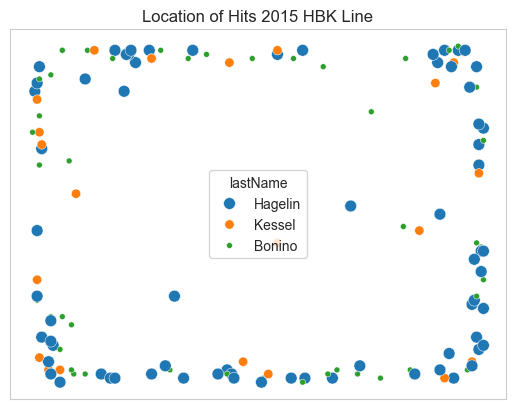

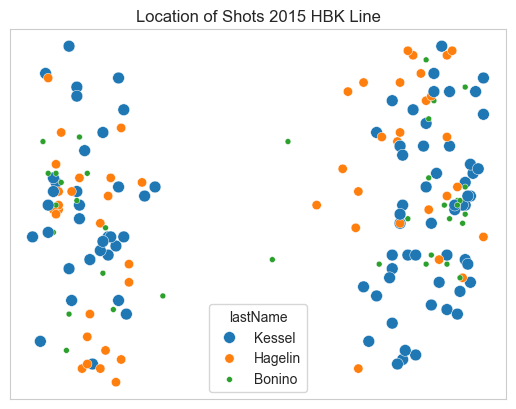

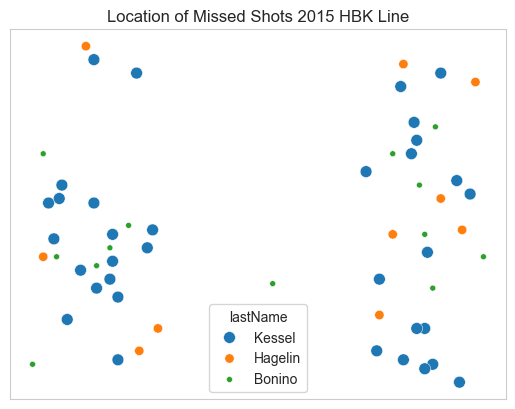

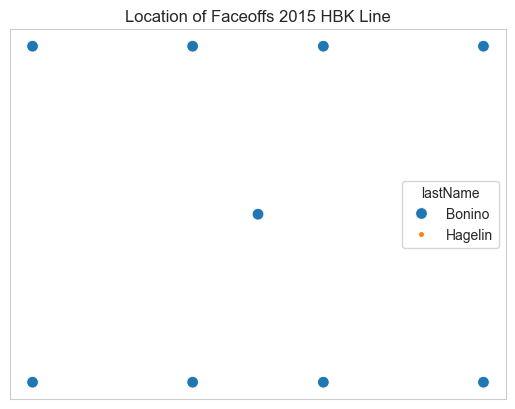

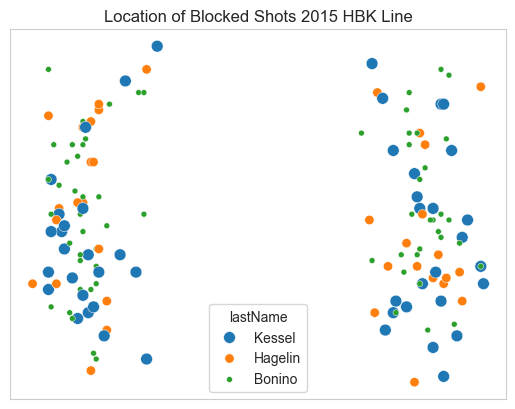

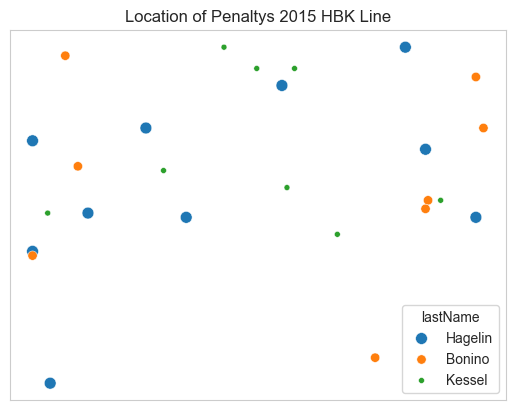

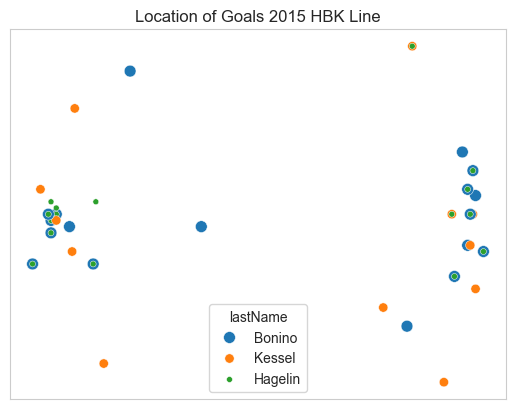

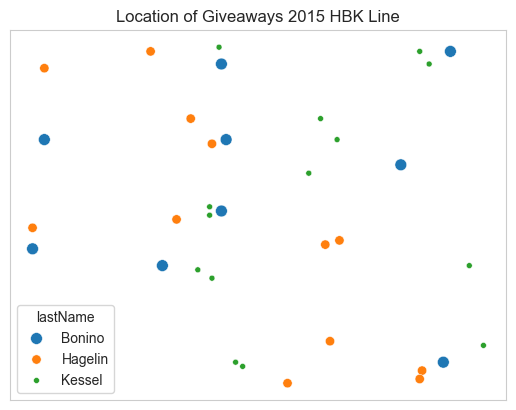

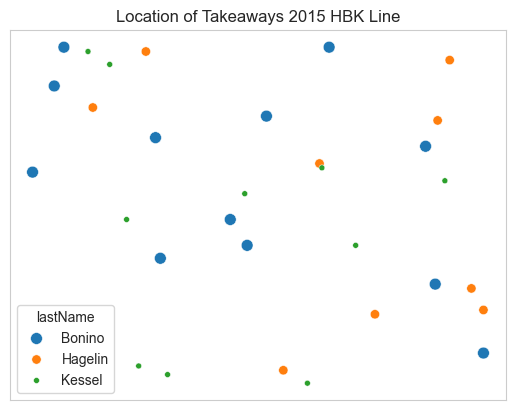

In [142]:
for event in events:
    plotHockeyPoints(HBK_line_201516_playoff_df, event)